# Smart Home Appliences Exploratory Data Analysis
In this notebook we are going to perform **Exploratory Data Analysis** on Smart Home Data.

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## Smart Home Data with Weather Information
This data contains the readings with a time span of 1 minute of 350 days of house appliances in kW from a smart meter and weather conditions of that particular region.

> #### Goal of this notebook
>* Download the Data
>* Data Preparation and Cleaning
>* Exploratory Analysis and Visualizations
>* Ask and Answer Questions
>* Summary and Conclusion

## Download the Data
We are downloading the dataset from **Kaggle** datasets.

> By using this dataset, we can understand the relationship between energy consumption by appliances and time period, or detect anomalous usage of appliances, or clarify the relationship between weather information and energy generated by solar power.

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Importing opendatasets
import opendatasets as od

# Getting the dataset url
download_url = 'https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information'

# Downloading the dataset
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venupodugu
Your Kaggle Key: ··········


  0%|          | 0.00/19.4M [00:00<?, ?B/s]

100%|██████████| 19.4M/19.4M [00:00<00:00, 46.7MB/s]


The dataset has been downloaded and extracted.

In [80]:
# Creating data filename
data_filename = './smart-home-dataset-with-weather-information/HomeC.csv'

Let us save and upload our work to Jovian before continuing.

In [81]:
project_name = 'smart-home-appliance-data-analysis'

## Data Preparation and Cleaning
> #### TODO:
> * Load the file using Pandas
> * Look at some information about the data and columns
> * Fix any missing or incorrect values
> * Create additional columns if necessary while parsing dates and merging multiple datasets

In [82]:
# Importing the Pandas library
import pandas as pd

In [83]:
# Creating pandas dataframe out of CSV file
df = pd.read_csv(data_filename)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [84]:
# Setting pandas display.max_columns option to display all the columns
pd.set_option('display.max_columns', None)

In [85]:
df

time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  Garage door [kW]  Kitchen 12 [kW]  Kitchen 14 [kW]  \
0               0.006983          0.013083         0.000417         0.000150   
1               0.006983          0.013117         0.000417         0.000150   
2               0.006983          0.013083         0.000433         0.000167   
3               0.006983          0.013000         0.000433         0.000217   
4               0.006850          0.012783         0.000450         0.000333   
...                  ...               ...              ...              ...   
503906          0.008433          0.013433         0.000467         0.000100   
503907          0.008467          0.012933         0.000533         0.000067   
503908          0.008233          0.012817         0.000517         0.000117   
503909          0.008133          0.012833         0.000517         0.000117   
503910               NaN               NaN              NaN              NaN   

        Kitchen 38 [kW]  Barn [kW]  Well [kW]  Microwave [kW]  \
0              0.000000   0.031350   0.001017        0.004067   
1              0.000000   0.031500   0.001017        0.004067   
2              0.000017   0.031517   0.001000        0.004067   
3              0.000000   0.031500   0.001017        0.004067   
4              0.000000   0.031500   0.001017        0.004067   
...                 ...        ...        ...             ...   
503906         0.000033   0.032200   0.000950        0.003800   
503907         0.000000   0.032283   0.001000        0.003750   
503908         0.000017   0.032183   0.000950        0.003767   
503909         0.000017   0.032167   0.000950        0.003767   
503910              NaN        NaN        NaN             NaN   

        Living room [kW]  Solar [kW]  temperature         icon  humidity  \
0               0.001517    0.003483        36.14  clear-night      0.62   
1               0.001650    0.003467        36.14  clear-night      0.62   
2               0.001650    0.003467        36.14  clear-night      0.62   
3               0.001617    0.003483        36.14  clear-night      0.62   
4               0.001583    0.003467        36.14  clear-night    

### About the Dataset
In this Dataset, energy data from house appliances and weather information are provided.
> #### House appliances connected to and retirieved from smartmeter is below:
> * Amount of house energy consumption
> * Dishwasher
> * Furnace
> * Home office
> * Fridge
> * Wine cellarc
> * Garage door
> * Kitchen
> * Barn
> * Well
> * Microwave
> * Living room
> * Solar power generation

By using this dataset, we can understand the relationship between energy consumption by appliances and time period, or detect anomalous usage of appliances, or clarify the relationship between weather information and energy generated by solar power.

### Weather information understanding
> In order to utilize weather information data, we need to understand what each weather information means actually.
**Source notebook: smart_home_data_processing___weather_vs_energy**

> * **temperature**
>     * physical quantity expressing hot and cold
> * **humidity**
>     * concentration of water vapour present in air
> * **visibility**
>     * meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its > luminous flux is reduced to 5% of its original value
> * **apparentTemperature**
>     * temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed
> * **pressure**
>     * Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
> * **windSpeed**
>     * fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature
> * **cloudCover**
>     * fraction of the sky obscured by clouds when observed from a particular location
> * **windBearing**
>     * In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
> * **dewPoint**
>     * the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form
> * **precipProbability**
>     * measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location
> * **precipIntensity**
>     * measure of the amount of rain that falls over time

In [86]:
# Features available in the dataset
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [87]:
# Removing unit(kW) from the column name
df.columns = [col.replace(' [kW]', '') for col in df.columns]

In [88]:
df

time       use       gen  House overall  Dishwasher  Furnace 1  \
0       1451624400  0.932833  0.003483       0.932833    0.000033   0.020700   
1       1451624401  0.934333  0.003467       0.934333    0.000000   0.020717   
2       1451624402  0.931817  0.003467       0.931817    0.000017   0.020700   
3       1451624403  1.022050  0.003483       1.022050    0.000017   0.106900   
4       1451624404  1.139400  0.003467       1.139400    0.000133   0.236933   
...            ...       ...       ...            ...         ...        ...   
503906  1452128306  1.599333  0.003233       1.599333    0.000050   0.104017   
503907  1452128307  1.924267  0.003217       1.924267    0.000033   0.422383   
503908  1452128308  1.978200  0.003217       1.978200    0.000050   0.495667   
503909  1452128309  1.990950  0.003233       1.990950    0.000050   0.494700   
503910           \       NaN       NaN            NaN         NaN        NaN   

        Furnace 2  Home office    Fridge  Wine cellar  Garage door  \
0        0.061917     0.442633  0.124150     0.006983     0.013083   
1        0.063817     0.444067  0.124000     0.006983     0.013117   
2        0.062317     0.446067  0.123533     0.006983     0.013083   
3        0.068517     0.446583  0.123133     0.006983     0.013000   
4        0.063983     0.446533  0.122850     0.006850     0.012783   
...           ...          ...       ...          ...          ...   
503906   0.625033     0.041750  0.005233     0.008433     0.013433   
503907   0.637733     0.042033  0.004983     0.008467     0.012933   
503908   0.620367     0.042100  0.005333     0.008233     0.012817   
503909   0.634133     0.042100  0.004917     0.008133     0.012833   
503910        NaN          NaN       NaN          NaN          NaN   

        Kitchen 12  Kitchen 14  Kitchen 38      Barn      Well  Microwave  \
0         0.000417    0.000150    0.000000  0.031350  0.001017   0.004067   
1         0.000417    0.000150    0.000000  0.031500  0.001017   0.004067   
2         0.000433    0.000167    0.000017  0.031517  0.001000   0.004067   
3         0.000433    0.000217    0.000000  0.031500  0.001017   0.004067   
4         0.000450    0.000333    0.000000  0.031500  0.001017   0.004067   
...            ...         ...         ...       ...       ...        ...   
503906    0.000467    0.000100    0.000033  0.032200  0.000950   0.003800   
503907    0.000533    0.000067    0.000000  0.032283  0.001000   0.003750   
503908    0.000517    0.000117    0.000017  0.032183  0.000950   0.003767   
503909    0.000517    0.000117    0.000017  0.032167  0.000950   0.003767   
503910         NaN         NaN         NaN       NaN       NaN        NaN   

        Living room     Solar  temperature         icon  humidity  visibility  \
0          0.001517  0.003483        36.14  clear-night      0.62       10.00   
1          0.001650  0.003467        36.14  clear-night      0.62       10.00   
2          0.001650  0.003467        36.14  clear-night      0.62       10.00   
3          0.001617  0.003483        36.14  clear-night      0.62       10.00   
4          0.001583  0.003467        36.14  clear-night      0.62       10.00   
...             ...       ...          ...          ...       ...         ...   
503906     0.000933  0.003233        35.12         rain      0.86        8.74   
503907     0.001000  0.003217        35.12         rain      0.86        8.74   
503908     0.000950  0.003217        35.12         rain      0.86        8.74   
503909     0.000950  0.003233        35.12         rain      0.86        8.74   
503910          NaN       NaN          NaN          NaN       NaN         NaN   

           summary  apparentTemperature  pressure  windSpeed  cloudCover  \
0            Clear                29.26   1016.91       9.18  cloudCover   
1            Clear                29.26   1016.91       9.18  cloudCover   
2            Clear                29.26   1016.91       9.18  cloudCover   
3         

In [89]:
len(df.columns)

32

In [90]:
# Shape of the dataset
df.shape

(503911, 32)

In [91]:
# Total information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Furnace 1            503910 non-null  float64
 6   Furnace 2            503910 non-null  float64
 7   Home office          503910 non-null  float64
 8   Fridge               503910 non-null  float64
 9   Wine cellar          503910 non-null  float64
 10  Garage door          503910 non-null  float64
 11  Kitchen 12           503910 non-null  float64
 12  Kitchen 14           503910 non-null  float64
 13  Kitchen 38           503910 non-null  float64
 14  Barn                 503910 non-null  float64
 15  Well             

In [92]:
# Statistical summmary of the dataset
df.describe()

use            gen  House overall     Dishwasher  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.858962       0.076229       0.858962       0.031368   
std         1.058207       0.128428       1.058207       0.190951   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.367667       0.003367       0.367667       0.000000   
50%         0.562333       0.004283       0.562333       0.000017   
75%         0.970250       0.083917       0.970250       0.000233   
max        14.714567       0.613883      14.714567       1.401767   

           Furnace 1      Furnace 2    Home office         Fridge  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.099210       0.136779       0.081287       0.063556   
std         0.169059       0.178631       0.104466       0.076199   
min         0.000017       0.000067       0.000083       0.000067   
25%         0.020233       0.064400       0.040383       0.005083   
50%         0.020617       0.066633       0.042217       0.005433   
75%         0.068733       0.080633       0.068283       0.125417   
max         1.934083       0.794933       0.971750       0.851267   

         Wine cellar    Garage door     Kitchen 12     Kitchen 14  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.042137       0.014139       0.002755       0.007023   
std         0.057967       0.014292       0.021860       0.076740   
min         0.000017       0.000017       0.000000       0.000000   
25%         0.007133       0.012733       0.000500       0.000017   
50%         0.008083       0.012933       0.000667       0.000050   
75%         0.053192       0.013100       0.000750       0.000167   
max         1.273933       1.088983       1.166583       2.262583   

          Kitchen 38           Barn           Well      Microwave  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.000009       0.058530       0.015642       0.010983   
std         0.000010       0.202706       0.137841       0.098859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.029833       0.000983       0.003617   
50%         0.000017       0.031317       0.001000       0.004000   
75%         0.000017       0.032883       0.001017       0.004067   
max         0.000183       7.027900       1.633017       1.929800   

         Living room          Solar    temperature       humidity  \
count  503910.000000  503910.000000  503910.000000  503910.000000   
mean        0.035313       0.076229      50.741935       0.664085   
std         0.096056       0.128428      19.113807       0.194389   
min         0.000000       0.000000     -12.640000       0.130000   
25%         0.001483       0.003367      35.770000       0.510000   
50%         0.001617       0.004283      50.320000       0.680000   
75%         0.001750       0.083917      66.260000       0.840000   
max         0.465217       0.613883      93.720000       0.980000   

          visibility  apparentTemperature       pressure      windSpeed  \
count  503910.000000        503910.000000  503910.000000  503910.000000   
mean        9.253444            48.263382    1016.301625       6.649936   
std         1.611186            22.027916       7.895185       3.982716   
min         0.270000           -32.080000     986.400000       0.000000   
25%         9.420000            31.090000    1011.290000       3.660000   
50%        10.000000            50.320000    1016.530000       5.930000   
75%        10.000000            66.260000    1021.480000       8.940000   
max        10.000000           101.120000    1042.460000      22.910000   

         windBearing  precipIntensity       dewPoint  precipProbability  
count  503910.000000    503910.000000  503910.000000      503910.000000  
mean      202.356843         0.002598      38.694013           0.056453  
std      

In [93]:
df.sample(10)

time       use       gen  House overall  Dishwasher  Furnace 1  \
142172  1451766572  1.050367  0.002800       1.050367    0.000217   0.486767   
1878    1451626278  1.543450  0.003350       1.543450    0.000200   0.454400   
487403  1452111803  0.033167  0.387483       0.033167    0.000283   0.020583   
402105  1452026505  0.424383  0.004267       0.424383    0.000000   0.020600   
114814  1451739214  0.765817  0.008117       0.765817    0.000000   0.063783   
300682  1451925082  7.140783  0.003367       7.140783    0.000117   0.020617   
427615  1452052015  0.438850  0.004300       0.438850    0.000250   0.020667   
133204  1451757604  0.548167  0.045867       0.548167    0.000017   0.062717   
488669  1452113069  0.863733  0.004233       0.863733    0.000000   0.020267   
446991  1452071391  0.292950  0.065083       0.292950    0.000000   0.020500   

        Furnace 2  Home office    Fridge  Wine cellar  Garage door  \
142172   0.062417     0.040317  0.004633     0.022917     0.012200   
1878     0.649767     0.048817  0.005350     0.121600     0.012600   
487403   0.065567     0.040383  0.129950     0.007917     0.013117   
402105   0.079700     0.064500  0.005500     0.007983     0.013100   
114814   0.103067     0.040133  0.005350     0.020283     0.012767   
300682   0.717517     0.182883  0.140433     0.028283     0.015500   
427615   0.065550     0.046717  0.108083     0.008033     0.013150   
133204   0.101683     0.039750  0.126017     0.073267     0.012883   
488669   0.063667     0.042417  0.137933     0.007800     0.012983   
446991   0.065350     0.040333  0.005567     0.008000     0.013067   

        Kitchen 12  Kitchen 14  Kitchen 38      Barn      Well  Microwave  \
142172    0.000617    0.000467    0.000000  0.030800  0.000850   0.003917   
1878      0.000650    0.000050    0.000017  0.032383  0.001000   0.004133   
487403    0.000417    0.000067    0.000000  0.029083  0.000983   0.003183   
402105    0.000733    0.000017    0.000017  0.032217  0.001000   0.003167   
114814    0.000550    0.000083    0.000000  0.030683  0.000967   0.003883   
300682    0.000033    0.000167    0.000000  0.029433  0.001017   0.003867   
427615    0.000533    0.000050    0.000000  0.032650  0.001000   0.003233   
133204    0.000383    0.000033    0.000017  0.030033  0.000967   0.004083   
488669    0.000350    0.000033    0.000017  0.029550  0.001000   0.003167   
446991    0.000750    0.015317    0.000017  0.029717  0.000983   0.003133   

        Living room     Solar  temperature               icon  humidity  \
142172     0.338800  0.002800        52.51        clear-night      0.80   
1878       0.001583  0.003350        28.65          clear-day      0.62   
487403     0.001517  0.387483        28.51        clear-night      0.50   
402105     0.001550  0.004267        73.44  partly-cloudy-day      0.61   
114814     0.331633  0.008117        54.78          clear-day      0.46   
300682     0.326117  0.003367        76.98          clear-day      0.51   
427615     0.001600  0.004300        31.95        clear-night      0.86   
133204     0.001383  0.045867        35.02          clear-day      0.29   
488669     0.326950  0.004233        12.40        clear-night      0.64   
446991     0.001700  0.065083        42.36          clear-day      0.80   

        visibility        summary  apparentTemperature  pressure  windSpeed  \
142172        9.56          Clear                52.51   1012.54      11.56   
1878         10.00          Clear                20.86   1015.67       7.86   
487403       10.00          Clear                17.32   1028.12      14.51   
402105       10.00  Partly Cloudy                73.44   1012.03       1.95   
114814       10.00          Clear                54.78   1012.52       6.39   
300682       10.00          Clear                76.98   1021.55       3.24   
427615        9.96          Clear                31.95   1021.99       2.46   
133204       10.00          Clear                26.58  

### Aggregating the related features
> There are multiple columns in Furnance and Kitchen. To make it simple, I aggregated them into new column by summing them up.

In [94]:
# Aggregating the features

df['Furnace'] = df[['Furnace 1', 'Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].sum(axis=1)

# Dropping unnecessary columns

df.drop(['Furnace 1', 'Furnace 2', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'icon', 'summary'], axis=1, inplace=True)

In [95]:
df

time       use       gen  House overall  Dishwasher  \
0       1451624400  0.932833  0.003483       0.932833    0.000033   
1       1451624401  0.934333  0.003467       0.934333    0.000000   
2       1451624402  0.931817  0.003467       0.931817    0.000017   
3       1451624403  1.022050  0.003483       1.022050    0.000017   
4       1451624404  1.139400  0.003467       1.139400    0.000133   
...            ...       ...       ...            ...         ...   
503906  1452128306  1.599333  0.003233       1.599333    0.000050   
503907  1452128307  1.924267  0.003217       1.924267    0.000033   
503908  1452128308  1.978200  0.003217       1.978200    0.000050   
503909  1452128309  1.990950  0.003233       1.990950    0.000050   
503910           \       NaN       NaN            NaN         NaN   

        Home office    Fridge  Wine cellar  Garage door      Barn      Well  \
0          0.442633  0.124150     0.006983     0.013083  0.031350  0.001017   
1          0.444067  0.124000     0.006983     0.013117  0.031500  0.001017   
2          0.446067  0.123533     0.006983     0.013083  0.031517  0.001000   
3          0.446583  0.123133     0.006983     0.013000  0.031500  0.001017   
4          0.446533  0.122850     0.006850     0.012783  0.031500  0.001017   
...             ...       ...          ...          ...       ...       ...   
503906     0.041750  0.005233     0.008433     0.013433  0.032200  0.000950   
503907     0.042033  0.004983     0.008467     0.012933  0.032283  0.001000   
503908     0.042100  0.005333     0.008233     0.012817  0.032183  0.000950   
503909     0.042100  0.004917     0.008133     0.012833  0.032167  0.000950   
503910          NaN       NaN          NaN          NaN       NaN       NaN   

        Microwave  Living room     Solar  temperature  humidity  visibility  \
0        0.004067     0.001517  0.003483        36.14      0.62       10.00   
1        0.004067     0.001650  0.003467        36.14      0.62       10.00   
2        0.004067     0.001650  0.003467        36.14      0.62       10.00   
3        0.004067     0.001617  0.003483        36.14      0.62       10.00   
4        0.004067     0.001583  0.003467        36.14      0.62       10.00   
...           ...          ...       ...          ...       ...         ...   
503906   0.003800     0.000933  0.003233        35.12      0.86        8.74   
503907   0.003750     0.001000  0.003217        35.12      0.86        8.74   
503908   0.003767     0.000950  0.003217        35.12      0.86        8.74   
503909   0.003767     0.000950  0.003233        35.12      0.86        8.74   
503910        NaN          NaN       NaN          NaN       NaN         NaN   

        apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                     29.26   1016.91       9.18  cloudCover        282.0   
1                     29.26   1016.91       9.18  cloudCover        282.0   
2                     29.26   1016.91       9.18  cloudCover        282.0   
3                     29.26   1016.91       9.18  cloudCover        282.0   
4                     29.26   1016.91       9.18  cloudCover        282.0   
...                     ...       ...        ...         ...          ...   
503906                29.45   1011.49       6.72        0.31        186.0   
503907                29.45   1011.49       6.72        0.31        186.0   
503908                29.45   1011.49       6.72        0.31        186.0   
503909                29.45   1011.49       6.72        0.31        186.0   
503910                  NaN       NaN        NaN         NaN          NaN   

        precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  
0                0.0000     24.40               0.00  0.082617  0.000567  
1                0.0000     24.40               0.00  0.084533  0.000567  
2                0.0000     24.40               0.00  0.083017  0.000617  
3                0.0000     24.40               0.00  0.175417

In [96]:
# Checking for null values if any
df.isnull().sum()

time                   0
use                    1
gen                    1
House overall          1
Dishwasher             1
Home office            1
Fridge                 1
Wine cellar            1
Garage door            1
Barn                   1
Well                   1
Microwave              1
Living room            1
Solar                  1
temperature            1
humidity               1
visibility             1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
Furnace                0
Kitchen                0
dtype: int64

### Dropping null values 

In [97]:
df[df.isnull().any(axis=1)]

time  use  gen  House overall  Dishwasher  Home office  Fridge  \
503910    \  NaN  NaN            NaN         NaN          NaN     NaN   

        Wine cellar  Garage door  Barn  Well  Microwave  Living room  Solar  \
503910          NaN          NaN   NaN   NaN        NaN          NaN    NaN   

        temperature  humidity  visibility  apparentTemperature  pressure  \
503910          NaN       NaN         NaN                  NaN       NaN   

        windSpeed cloudCover  windBearing  precipIntensity  dewPoint  \
503910        NaN        NaN          NaN              NaN       NaN   

        precipProbability  Furnace  Kitchen  
503910                NaN      0.0      0.0

> Last row contains NaN, so we remove it from data.

In [98]:
df = df[0:-1]
df

time       use       gen  House overall  Dishwasher  \
0       1451624400  0.932833  0.003483       0.932833    0.000033   
1       1451624401  0.934333  0.003467       0.934333    0.000000   
2       1451624402  0.931817  0.003467       0.931817    0.000017   
3       1451624403  1.022050  0.003483       1.022050    0.000017   
4       1451624404  1.139400  0.003467       1.139400    0.000133   
...            ...       ...       ...            ...         ...   
503905  1452128305  1.601233  0.003183       1.601233    0.000050   
503906  1452128306  1.599333  0.003233       1.599333    0.000050   
503907  1452128307  1.924267  0.003217       1.924267    0.000033   
503908  1452128308  1.978200  0.003217       1.978200    0.000050   
503909  1452128309  1.990950  0.003233       1.990950    0.000050   

        Home office    Fridge  Wine cellar  Garage door      Barn      Well  \
0          0.442633  0.124150     0.006983     0.013083  0.031350  0.001017   
1          0.444067  0.124000     0.006983     0.013117  0.031500  0.001017   
2          0.446067  0.123533     0.006983     0.013083  0.031517  0.001000   
3          0.446583  0.123133     0.006983     0.013000  0.031500  0.001017   
4          0.446533  0.122850     0.006850     0.012783  0.031500  0.001017   
...             ...       ...          ...          ...       ...       ...   
503905     0.041783  0.005267     0.008667     0.013483  0.032283  0.000983   
503906     0.041750  0.005233     0.008433     0.013433  0.032200  0.000950   
503907     0.042033  0.004983     0.008467     0.012933  0.032283  0.001000   
503908     0.042100  0.005333     0.008233     0.012817  0.032183  0.000950   
503909     0.042100  0.004917     0.008133     0.012833  0.032167  0.000950   

        Microwave  Living room     Solar  temperature  humidity  visibility  \
0        0.004067     0.001517  0.003483        36.14      0.62       10.00   
1        0.004067     0.001650  0.003467        36.14      0.62       10.00   
2        0.004067     0.001650  0.003467        36.14      0.62       10.00   
3        0.004067     0.001617  0.003483        36.14      0.62       10.00   
4        0.004067     0.001583  0.003467        36.14      0.62       10.00   
...           ...          ...       ...          ...       ...         ...   
503905   0.003800     0.000967  0.003183        35.12      0.86        8.74   
503906   0.003800     0.000933  0.003233        35.12      0.86        8.74   
503907   0.003750     0.001000  0.003217        35.12      0.86        8.74   
503908   0.003767     0.000950  0.003217        35.12      0.86        8.74   
503909   0.003767     0.000950  0.003233        35.12      0.86        8.74   

        apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                     29.26   1016.91       9.18  cloudCover        282.0   
1                     29.26   1016.91       9.18  cloudCover        282.0   
2                     29.26   1016.91       9.18  cloudCover        282.0   
3                     29.26   1016.91       9.18  cloudCover        282.0   
4                     29.26   1016.91       9.18  cloudCover        282.0   
...                     ...       ...        ...         ...          ...   
503905                29.45   1011.49       6.72        0.31        186.0   
503906                29.45   1011.49       6.72        0.31        186.0   
503907                29.45   1011.49       6.72        0.31        186.0   
503908                29.45   1011.49       6.72        0.31        186.0   
503909                29.45   1011.49       6.72        0.31        186.0   

        precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  
0                0.0000     24.40               0.00  0.082617  0.000567  
1                0.0000     24.40               0.00  0.084533  0.000567  
2                0.0000     24.40               0.00  0.083017  0.000617  
3                0.0000     24.40               0.00  0.175417

In [99]:
df.cloudCover.dtype

dtype('O')

In [100]:
df.cloudCover.unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

> There are some invalid values in 'cloudCover' column and it must be of 'float64' type but it is of type 'Object'

In [101]:
df[df.cloudCover == 'cloudCover'].shape

(58, 27)

> 'cloudCover' value was found in the column 'cloudCover' in 58 rows. Maybe this is a data collection mistake.
>
> So let's replace these invalid values with the next valid value.

In [102]:
df['cloudCover'].replace('cloudCover', method='bfill', inplace=True)

> Also let's change the data type of 'cloudCover' feature from 'Object' to 'float64'.

In [103]:
df['cloudCover'] = df['cloudCover'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
df.cloudCover.dtype

dtype('float64')

## Exploratory Analysis and Visualization

### Datetime Information
Let's convert the 'time' feature from type 'Object' to 'Datetime'

Here, the 'time' feature is in 'unixtimestamp'

> The Unix timestamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch on January 1st, 1970 at UTC. Therefore, the Unix timestamp is merely the number of seconds between a particular date and the Unix Epoch.

The time-step is in increments of seconds though the data was collected with time-span of 1 minute

In [105]:
pd.to_datetime(df['time'], unit='s').head(2)

0   2016-01-01 05:00:00
1   2016-01-01 05:00:01
Name: time, dtype: datetime64[ns]

> We need to create new daterange in increments of minutes.

In [106]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df), freq='min'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
df.head(3)

time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn      Well  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  0.001017   
1     0.444067  0.124000     0.006983     0.013117  0.031500  0.001017   
2     0.446067  0.123533     0.006983     0.013083  0.031517  0.001000   

   Microwave  Living room     Solar  temperature  humidity  visibility  \
0   0.004067     0.001517  0.003483        36.14      0.62        10.0   
1   0.004067     0.001650  0.003467        36.14      0.62        10.0   
2   0.004067     0.001650  0.003467        36.14      0.62        10.0   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18        0.75        282.0   
1                29.26   1016.91       9.18        0.75        282.0   
2                29.26   1016.91       9.18        0.75        282.0   

   precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  
0              0.0      24.4                0.0  0.082617  0.000567  
1              0.0      24.4                0.0  0.084533  0.000567  
2              0.0      24.4                0.0  0.083017  0.000617

> To utilize datetime information such as year, month and day in EDA and modeling phase, we need to extract them from time column.

In [ ]:
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['weekday'] = pd.DatetimeIndex(df['time']).weekday
df['day'] = pd.DatetimeIndex(df['time']).day
df['weekofyear'] = pd.DatetimeIndex(df['time']).weekofyear
df['hour'] = pd.DatetimeIndex(df['time']).hour
df['minute'] = pd.DatetimeIndex(df['time']).minute

In [109]:
df.year.unique()

array([2016])

In [110]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [111]:
df.weekday.unique()

array([4, 5, 6, 0, 1, 2, 3])

In [112]:
df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [113]:
df.weekofyear.unique()

array([53,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [114]:
df.hour.unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  0,  1,  2,  3,  4])

In [115]:
df.minute.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59])

### Timing information
> Hour variable can be broken into Night, Morning, Afternoon and Evening based on its number.
> * **Night** : 22:00 - 23:59 / 00:00 - 03:59
> * **Morning** : 04:00 - 11:59
> * **Afternoon** : 12:00 - 16:59
> * **Evening** : 17:00 - 21:59
>
> We can create timing variable based on hour variable.

In [116]:
def hours_to_timing(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        timing = 'Night'
    elif hour in range(4, 12):
        timing = 'Morning'
    elif hour in range(12, 17):
        timing = 'Afternoon'
    elif hour in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing

In [117]:
df['timing'] = df['hour'].apply(hours_to_timing)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   

   Home office    Fridge  Wine cellar  Garage door      Barn      Well  \
0     0.442633  0.124150     0.006983     0.013083  0.031350  0.001017   
1     0.444067  0.124000     0.006983     0.013117  0.031500  0.001017   
2     0.446067  0.123533     0.006983     0.013083  0.031517  0.001000   

   Microwave  Living room     Solar  temperature  humidity  visibility  \
0   0.004067     0.001517  0.003483        36.14      0.62        10.0   
1   0.004067     0.001650  0.003467        36.14      0.62        10.0   
2   0.004067     0.001650  0.003467        36.14      0.62        10.0   

   apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0                29.26   1016.91       9.18        0.75        282.0   
1                29.26   1016.91       9.18        0.75        282.0   
2                29.26   1016.91       9.18        0.75        282.0   

   precipIntensity  dewPoint  precipProbability   Furnace   Kitchen  year  \
0              0.0      24.4                0.0  0.082617  0.000567  2016   
1              0.0      24.4                0.0  0.084533  0.000567  2016   
2              0.0      24.4                0.0  0.083017  0.000617  2016   

   month  weekday  day  weekofyear  hour  minute   timing  
0      1        4    1          53     5       0  Morning  
1      1        4    1          53     5       1  Morning  
2      1        4    1          53     5       2  Morning

### Identifying duplicate features
> According to dataset information, there may be some similar columns.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

#### Importing required libraries for visualization

In [118]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

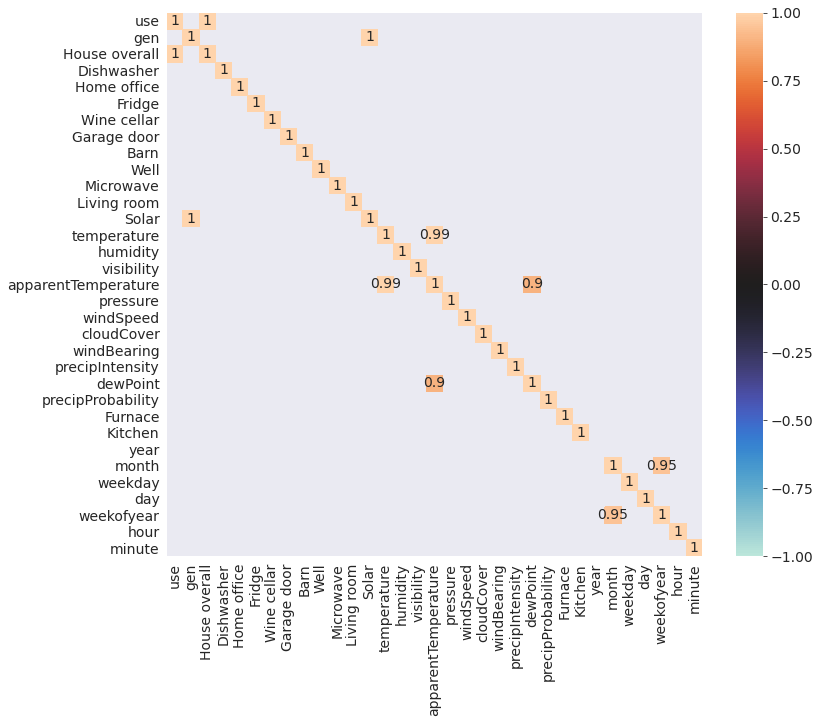

In [119]:
fig = plt.subplots(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=-1, annot=True, center=0)

> 'use' - 'House overall' and 'gen' - 'Solar' columns' correlation coefficient is almost over 0.95, so we need to put these columns together as a new columns.

In [122]:
df['use_house_overall'] = df['use']
df['gen_solar'] = df['gen']

df.drop(['use', 'House overall', 'gen', 'Solar'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [123]:
df.head(3)

time  Dishwasher  Home office    Fridge  Wine cellar  \
0 2016-01-01 05:00:00    0.000033     0.442633  0.124150     0.006983   
1 2016-01-01 05:01:00    0.000000     0.444067  0.124000     0.006983   
2 2016-01-01 05:02:00    0.000017     0.446067  0.123533     0.006983   

   Garage door      Barn      Well  Microwave  Living room  temperature  \
0     0.013083  0.031350  0.001017   0.004067     0.001517        36.14   
1     0.013117  0.031500  0.001017   0.004067     0.001650        36.14   
2     0.013083  0.031517  0.001000   0.004067     0.001650        36.14   

   humidity  visibility  apparentTemperature  pressure  windSpeed  cloudCover  \
0      0.62        10.0                29.26   1016.91       9.18        0.75   
1      0.62        10.0                29.26   1016.91       9.18        0.75   
2      0.62        10.0                29.26   1016.91       9.18        0.75   

   windBearing  precipIntensity  dewPoint  precipProbability   Furnace  \
0        282.0              0.0      24.4                0.0  0.082617   
1        282.0              0.0      24.4                0.0  0.084533   
2        282.0              0.0      24.4                0.0  0.083017   

    Kitchen  year  month  weekday  day  weekofyear  hour  minute   timing  \
0  0.000567  2016      1        4    1          53     5       0  Morning   
1  0.000567  2016      1        4    1          53     5       1  Morning   
2  0.000617  2016      1        4    1          53     5       2  Morning   

   use_house_overall  gen_solar  
0           0.932833   0.003483  
1           0.934333   0.003467  
2           0.931817   0.003467

### House appliances

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Energy Consumption Distribution')

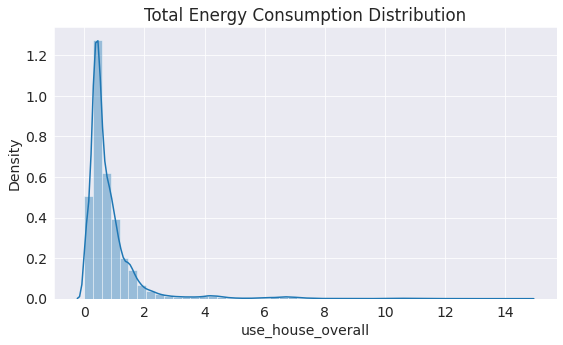

In [124]:
sns.distplot(df['use_house_overall'])
plt.title('Total Energy Consumption Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Energy Generation Distribution')

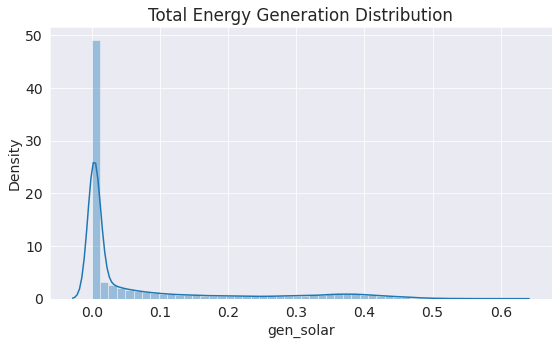

In [126]:
sns.distplot(df['gen_solar'], norm_hist=True)
plt.title('Total Energy Generation Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

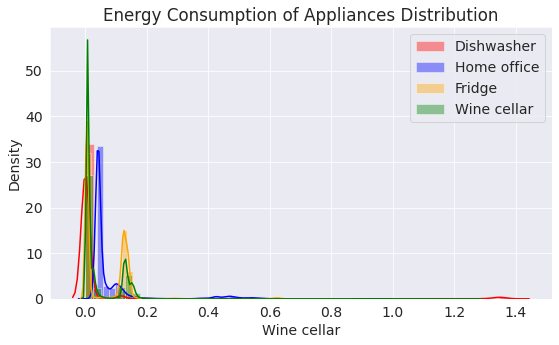

In [127]:
sns.distplot(df['Dishwasher'], color='red', label='Dishwasher')
sns.distplot(df['Home office'], color='blue', label='Home office')
sns.distplot(df['Fridge'], color='orange', label='Fridge')
sns.distplot(df['Wine cellar'], color='green', label='Wine cellar')
plt.title('Energy Consumption of Appliances Distribution')
plt.legend();

In [ ]:
!pip install "holoviews"

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
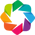

In [128]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [131]:
use = hv.Distribution(df['use_house_overall']).opts(title='Total Energy Consumption Distribution', color='red')
gen = hv.Distribution(df['gen_solar']).opts(title='Total Energy Generation Distribution', color='blue')
(use + gen).opts(opts.Distribution(xlabel='Enegry Consumption', ylabel='Density', 
                                   xformatter='%.1fkW', width=400, height=300, 
                                   tools=['hover'], show_grid=True))

:Layout
   .Distribution.I  :Distribution   [use_house_overall]   (Density)
   .Distribution.II :Distribution   [gen_solar]   (Density)

## Asking and Answering Questions
> 1. Is there any change in Power consumption/generation with respect to time?
> 2. Which 5 appliances are consuming more power?
> 3. Is the power consumption/generation temperature dependent?
> 4. What is the effect of humidity on power cosumption?
> 5. Is Energy generation weather dependent?

#### Q1: Is there any change in Power Concumptio/Generation with respect to time?
The overall power consumption is more during 10am to 12noon and 7pm to 4am. The reason is people return from work around 6pm and use all the appliances. 

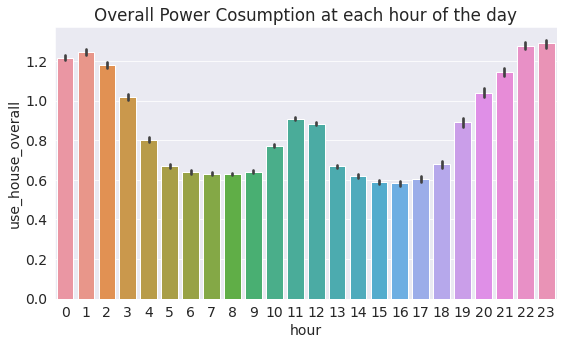

In [132]:
sns.barplot(x=df['hour'], y=df['use_house_overall'])
plt.title('Overall Power Cosumption at each hour of the day');

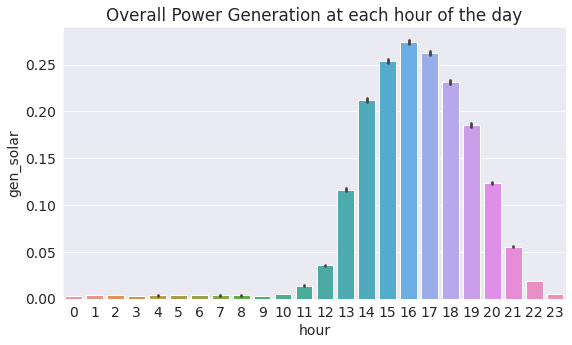

In [133]:
sns.barplot(x=df['hour'], y=df['gen_solar'])
plt.title('Overall Power Generation at each hour of the day');

> The Power generation is more between 1pm and 8pm

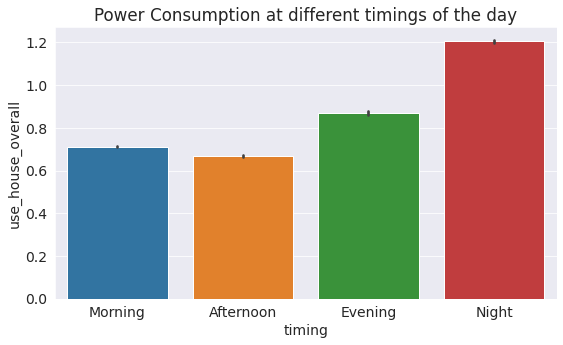

In [134]:
sns.barplot(x=df['timing'], y=df['use_house_overall'])
plt.title('Power Consumption at different timings of the day');

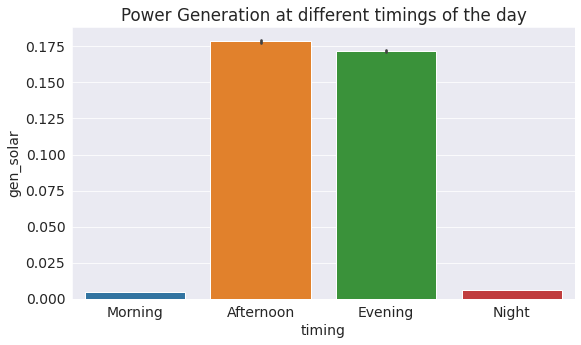

In [135]:
sns.barplot(x=df['timing'], y=df['gen_solar'])
plt.title('Power Generation at different timings of the day');

#### Q2: Which 5 appliances are consuming more power?
The following devices are consuming more power
1. Barn
2. Furnace
3. Kitchen 
4. Microwave
5. Well

In [136]:
def max_power_cons(columns):
    device_dict = {}
    for col in columns:
        max_pow = df[col].max()
        device_dict.update({col: max_pow})
        #device_dict[col].append(max_pow)
    return device_dict

In [137]:
device_columns = ['Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen']

In [138]:
device_max_power_cons = max_power_cons(device_columns)
device_max_power_cons

{'Barn': 7.0279,
 'Dishwasher': 1.401766667,
 'Fridge': 0.851266667,
 'Furnace': 2.472633333,
 'Garage door': 1.088983333,
 'Home office': 0.97175,
 'Kitchen': 2.265866667,
 'Living room': 0.46521666700000003,
 'Microwave': 1.9298,
 'Well': 1.633016667,
 'Wine cellar': 1.273933333}

In [139]:
sorted_devices = sorted(device_max_power_cons.items(), reverse=True, key=lambda x: x[1])

for device in sorted_devices:
    print(device[0], '::', device[1])

Barn :: 7.0279
Furnace :: 2.472633333
Kitchen :: 2.265866667
Microwave :: 1.9298
Well :: 1.633016667
Dishwasher :: 1.401766667
Wine cellar :: 1.273933333
Garage door :: 1.088983333
Home office :: 0.97175
Fridge :: 0.851266667
Living room :: 0.46521666700000003


#### Q3: Is the power consumption/generation temperature dependent?
It seems like the power consumption is temperature dependent. The consumption is more when the temperatures are too low or too high.

In [140]:
df.temperature.min(), df.temperature.max()

(-12.64, 93.72)

In [141]:
def Temperature(temp):
    if temp <= -5:
        temp_intervel = -10
    elif temp in range(-5, 5):
        temp_intervel = 0
    elif temp in range(5, 15):
        temp_intervel = 10
    elif temp in range(15, 25):
        temp_intervel = 20
    elif temp in range(25, 35):
        temp_intervel = 30
    elif temp in range(35, 45):
        temp_intervel = 40
    elif temp in range(45, 55):
        temp_intervel = 50
    elif temp in range(55, 65):
        temp_intervel = 60
    elif temp in range(65, 75):
        temp_intervel = 70
    elif temp in range(75, 85):
        temp_intervel = 80
    elif temp >= 85:
        temp_intervel = 90
    else:
        temp_intervel = 50
    return temp_intervel

In [142]:
df['temp_intervels'] = df['temperature'].apply(Temperature)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


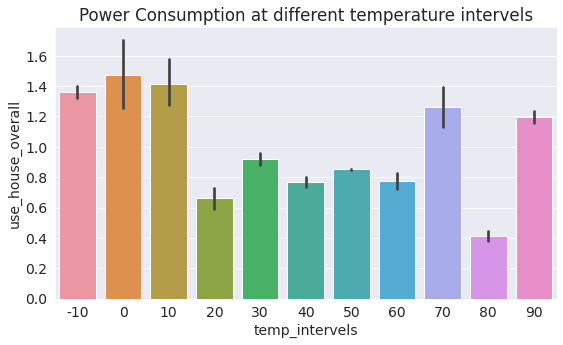

In [143]:
sns.barplot(x=df['temp_intervels'], y=df['use_house_overall'])
plt.title('Power Consumption at different temperature intervels');

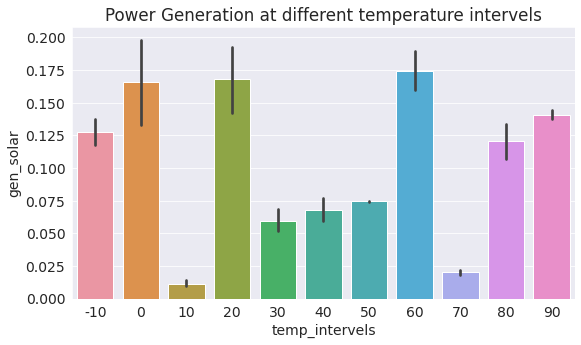

In [144]:
sns.barplot(x=df['temp_intervels'], y=df['gen_solar'])
plt.title('Power Generation at different temperature intervels');

> It seems like the power generation is not dependent on temperatures rather it might depend on the weather of the day.

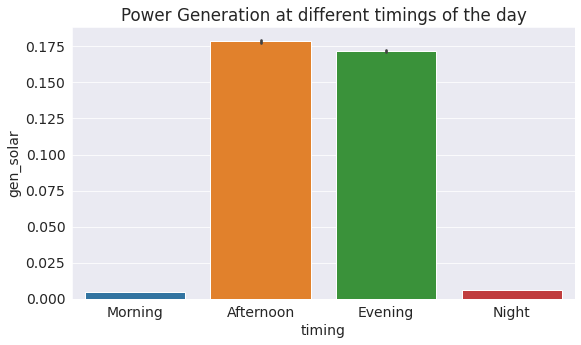

In [145]:
sns.barplot(x=df['timing'], y=df['gen_solar'])
plt.title('Power Generation at different timings of the day');

> It seems like the Power generation is more during day time when compared night time.

#### Q4: What is the effect of humidity on power cosumption and power generation?
Power Consumption and Power Generation are independent of Humidity. This is shown in the following plots.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


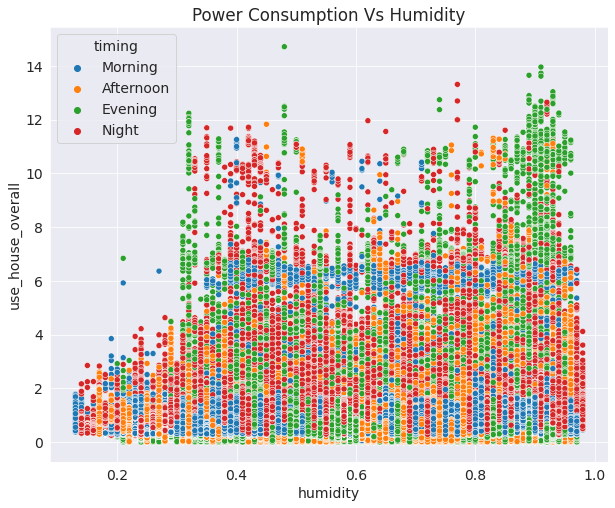

In [146]:
plt.figure(figsize=(10, 8))
sns.scatterplot(df['humidity'], df['use_house_overall'], hue=df['timing'])
plt.title('Power Consumption Vs Humidity');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


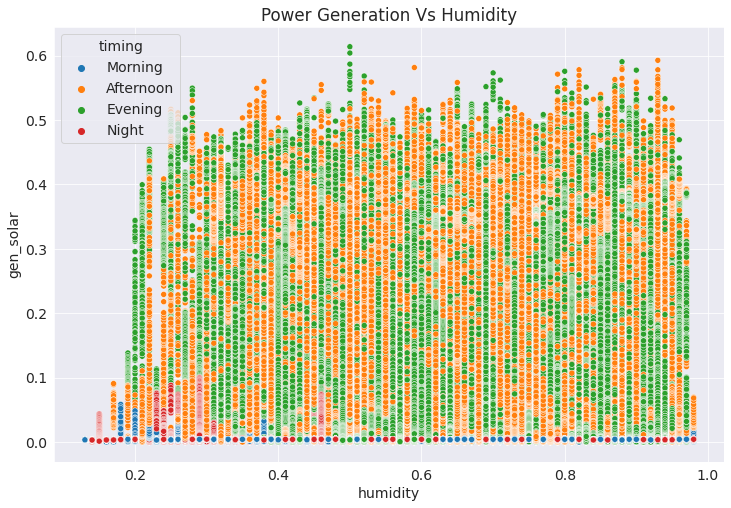

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df['humidity'], df['gen_solar'], hue=df['timing'])
plt.title('Power Generation Vs Humidity');

#### Q5: Is Energy generation weather dependent?

In [54]:
weather_columns = ['temperature', 'humidity', 'windSpeed', 'cloudCover', 'use_house_overall', 'gen_solar']

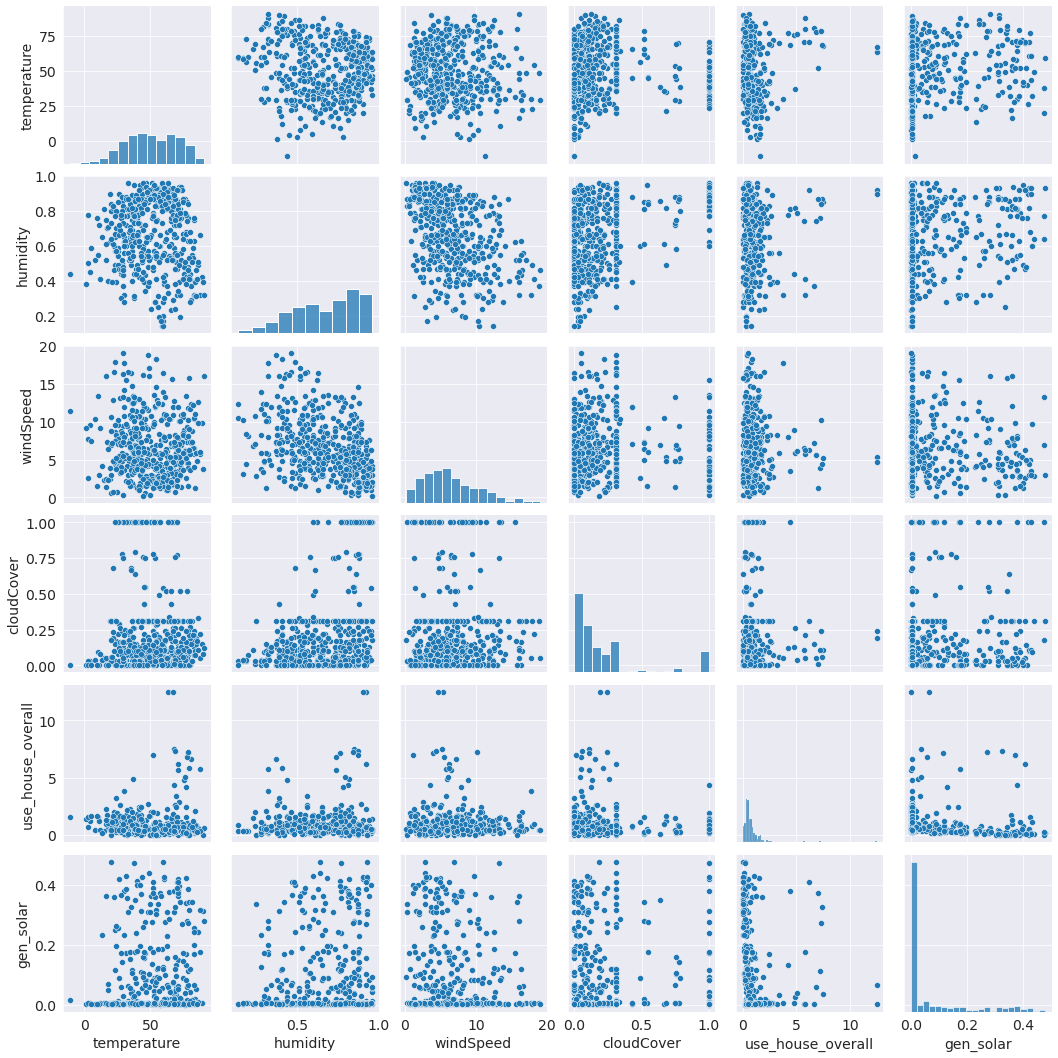

In [55]:
sns.pairplot(df[weather_columns].sample(500));

The Power Generation is not directly related to the weather conditions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


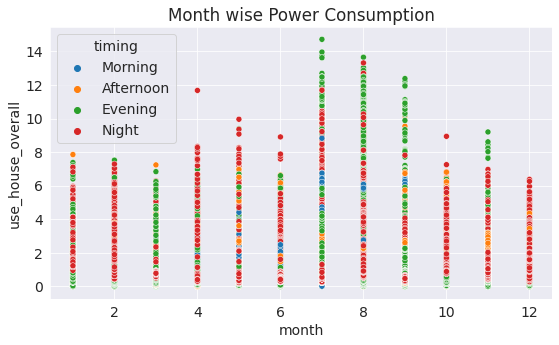

In [61]:
sns.scatterplot(df['month'], df['use_house_overall'], hue=df['timing']);
plt.title('Month wise Power Consumption');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


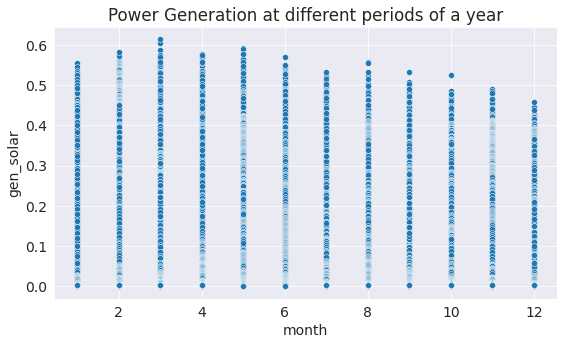

In [62]:
sns.scatterplot(df['month'], df['gen_solar'])
plt.title('Power Generation at different periods of a year');

### Correlation Analysis
There is no correlation in each appliances.

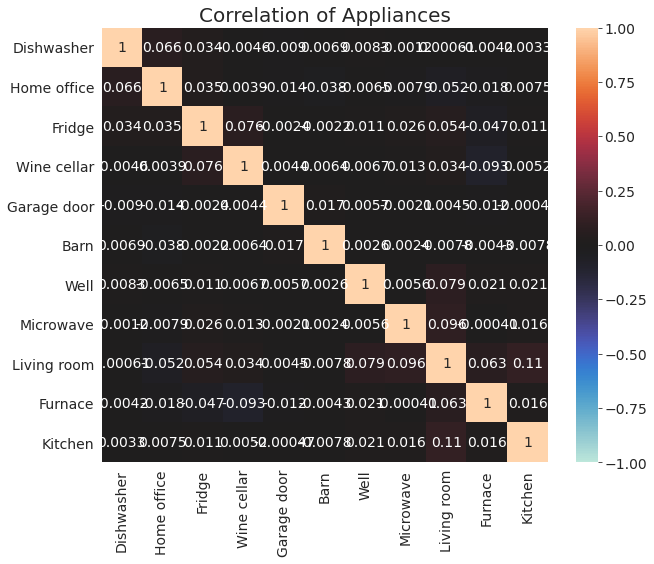

In [149]:
fig,ax = plt.subplots(figsize=(10, 8)) 
corr = df[['Dishwasher','Home office','Fridge','Wine cellar','Garage door','Barn','Well','Microwave','Living room','Furnace','Kitchen']].corr()
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, center=0)
ax.set_title('Correlation of Appliances',size=20)
plt.show()

Let us save and upload our work to Jovian before continuing.

## Summary and Conclusion
> * Energy consumption is low during the day and high at night.
> * Energy generation is high during the day and low at night.
> * It is thought that this is because Energy generation is promoted because there are no residents at home during the daytime, and consumption increases at night because the residents return home.

## References and Future Work

> The dataset can be explored more using individual home appliances. We can also explore weekly, monthly and daily trends of Energy Consumption and Energy Distribution.

To Know more about the data:

Very good data understanding & EDA & time-series modeling
https://www.kaggle.com/malekzadeh/smart-home-data-processing-weather-vs-energy